In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("births.csv")
data["Decade"] = (data["year"] // 10) * 10
data.head()

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [3]:
print(data.describe())

               year         month           day         births        Decade
count  15547.000000  15547.000000  15067.000000   15547.000000  15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561   1974.544285
std        6.728340      3.449632     15.284034   28552.465810      6.789583
min     1969.000000      1.000000      1.000000       1.000000   1960.000000
25%     1974.000000      4.000000      8.000000    4358.000000   1970.000000
50%     1979.000000      7.000000     16.000000    4814.000000   1970.000000
75%     1984.000000     10.000000     24.000000    5289.500000   1980.000000
max     2008.000000     12.000000     99.000000  199622.000000   2000.000000


In [5]:
data.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

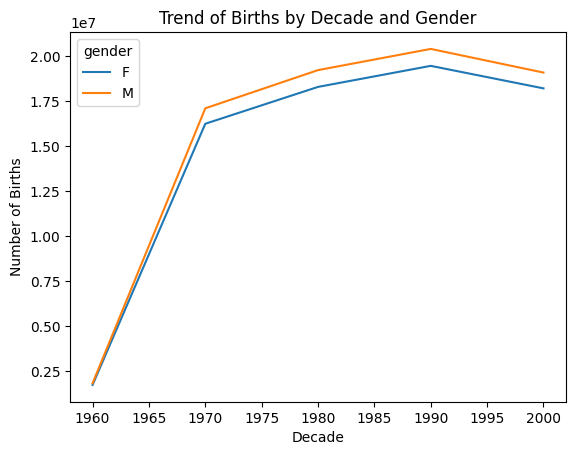

In [13]:
birth_trend = data.groupby(["Decade", "gender"])["births"].sum().unstack()
birth_trend.plot(kind="line")
plt.title("Trend of Births by Decade and Gender")
plt.xlabel("Decade")
plt.ylabel("Number of Births")
plt.show()

In [19]:
# Removing outliers
mean_births = data['births'].mean()
std_dev_births = data['births'].std()
births_data = data[(data['births'] >= mean_births - 5 * std_dev_births) & 
                          (data['births'] <= mean_births + 5 * std_dev_births)]


C:\Users\tayya\AppData\Local\Temp\ipykernel_13680\1910863588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births_data['Weekday'] = pd.to_datetime(births_data['day']).dt.dayofweek
C:\Users\tayya\AppData\Local\Temp\ipykernel_13680\1910863588.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  births_by_weekday = births_data.groupby(['Decade', 'day']).mean()['births'].unstack()


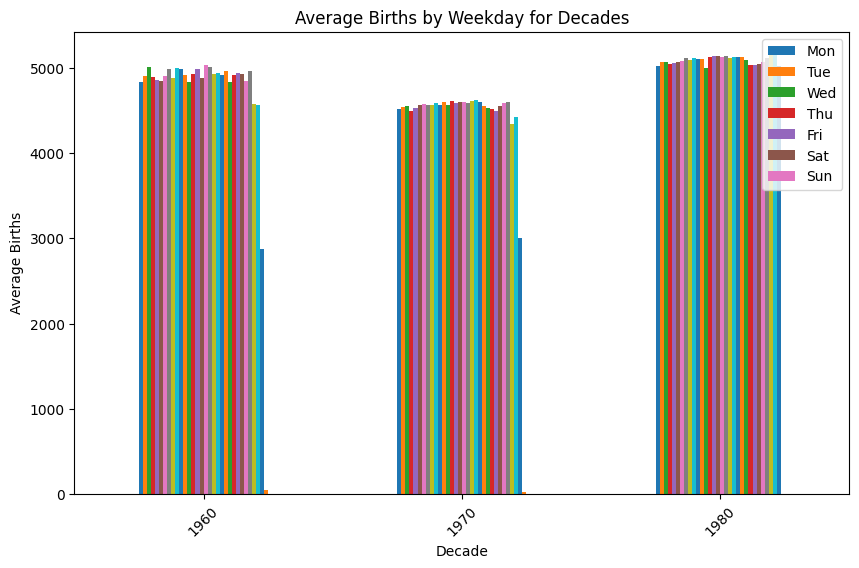

In [22]:
import matplotlib.pyplot as plt

# Plot births by weekday for several decades
births_data['Weekday'] = pd.to_datetime(births_data['day']).dt.dayofweek
births_by_weekday = births_data.groupby(['Decade', 'day']).mean()['births'].unstack()

# Plot
births_by_weekday.plot(kind='bar', figsize=(10, 6))
plt.title('Average Births by Weekday for Decades')
plt.xlabel('Decade')
plt.ylabel('Average Births')
plt.xticks(rotation=45)
plt.legend(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()
